## **KSL FINGERSPELLING RECOGNITION**

### INTRODUCTION

<img src="https://github.com/JamesMbeti/KSL-FINGERSPELLING-RECOGNITION/blob/main/ksl.png?raw=1" />

### Overview
- Fingerspelling is a technique that makes use of hand formations to represent words and letters. Using fingerspelling, one can communicate information such as phone numbers, names, and even addresses. However, hearing impaired individuals find it difficult to merge the current technological advancements, such as, smartphones with fingerspelling because they happen to do it a lot faster than their devices. Therefore, there is need to bridge the gap between fingerspelling and typing on smartphones.
- Fingerspelling has grown to become one of the most crucial manual communication systems in the world. For deaf and individuals with hearing impairment issues, fingerspelling is one of the ways that they can communicate with those around them. However, few people are able to discern figerspelling and this leads to communication breakdowns. The use of machine learning technology can help to merge fingerspelling with exact letters and symbols to help enhance communication.

### Problem Statement
- The deaf and hearing impaired community faces significant communication barriers with the rest of the society. This is because sign language is not widely understood by everyone else around them, and this can lead to difficulties in communication or communication breakdowns. To address this issue, this project aims to develop a Convolutional Neural Network (CNN) model specifically designed for fingerspelling recognition, allowing for accurate identification of individual letters and complete words in different sign languages. By improving the recognition of fingerspelling gestures, the model seeks to enhance communication accessibility for individuals who are deaf or hard of hearing, promoting inclusivity and fostering effective communication with the broader society.

### Objectives
- Our objective is to create an innovative machine learning model that acts as a vital bridge, connecting the deaf and mute community with the wider society.

This model will have the capability to translate various sign languages, including American Sign Language (ASL) and Kenyan Sign Language (KSL), into their corresponding individual letters, enabling the broader community to learn and understand sign language for improved communication with their deaf loved ones. Additionally, this development will empower the deaf and mute community to communicate effectively amongst themselves, fostering inclusivity and enhancing overall interactions. Through this project, we aspire to facilitate seamless communication, foster understanding, and promote inclusiveness between these communities.

#### Specific Objectives
1. Develop a Convolutional Neural Network (CNN) model specifically designed for fingerspelling recognition in different sign languages.
2. Train the model using a large dataset of fingerspelling gestures in various sign languages, ensuring accuracy and reliability in recognizing individual letters and complete words.
3. Conduct extensive testing and evaluation to assess the model's performance and accuracy in recognizing fingerspelling gestures across different sign languages.
4. Deploy the model.

### Success Metrics

**Accuracy**: This is the most common metric for evaluating the performance of a CNN algorithm. It is calculated as the percentage of test images that are correctly classified. We intend to achieve an accuracy of over 90% which will deem the project a success.

### Data Understanding
- The dataset is publicly available on Kaggle which we then added over 3,000 images taken by the group members doing the fingerspelling.
- The signs provided are based on the Kenyan Sign Language letter database which is made up of 24 classes of letters with the exclusion of `J` and `Z`. The two letters have been excluded because they require the use of motion.
- Further, the dataset is divided into train and test sets each with 27455 and 7172 cases, respectively. The total number of columns for both is 784.

### DATA PREPROCESSING

In [ ]:
#importing necessary libraries
import cv2
import os
import joblib
import skimage
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array
from keras import layers, initializers, optimizers, regularizers

# Setting a random seed
np.random.seed(180)

plt.style.use("ggplot")

#### Kaggle Dataset

In [ ]:
# Reading train and test dataset
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

# printing first five rows of the train data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# a class to decribe the dataset
class Describer:

    #initialize an object
    def __init__(self, df):
        self.df = df

    #checking the shape of the data
    def shape(self, name):
        return print(f"The {name} dataset has {self.df.shape[0]} entries and {self.df.shape[1]} columns")

In [ ]:
#Viewing the shape of the train dataset
data = Describer(train)
data.shape("train")

The train dataset has 27455 entries and 785 columns


In [ ]:
#Viewing the shape of the test dataset
data = Describer(test)
data.shape("test")

The test dataset has 7172 entries and 785 columns


In [ ]:
# Displaying the column names
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

* The pixel columns represent the pixel intensity of an image and the label column represents what letter the image stands for from 0-23.

In [ ]:
# reading the collected raw images
train_generator = ImageDataGenerator().flow_from_directory("data/train", target_size=(28,28),
                                                           batch_size=3000)

Found 2820 images belonging to 24 classes.


In [ ]:
#Getting all images and labels
train_images, train_labels = next(train_generator)

In [ ]:
#Flattening images into lists of pixels
images_list = []
for img_array in train_images:
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    images_list.append(gray.reshape(-1, 784).flatten().tolist())

In [ ]:
#converting the images to a DataFrame
raw_img_df = pd.DataFrame(images_list)
raw_img_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,153.348999,153.164001,154.164001,154.164001,155.164001,155.164001,156.805008,160.164001,159.164001,159.164001,...,69.789001,70.621002,66.219002,63.219002,89.219002,108.057999,211.153015,214.326996,218.626007,219.626007
1,152.779999,152.779999,152.779999,154.779999,153.181992,154.182007,158.182007,158.182007,158.182007,159.182007,...,203.316010,211.473007,209.402008,202.699997,138.024994,67.464005,61.775997,130.503998,147.350998,123.675995
2,157.187012,177.199005,211.810013,171.917007,161.383011,160.518005,171.938004,160.600998,171.185013,169.434006,...,45.084999,48.085003,41.612000,46.612000,53.612000,49.085003,44.084999,54.096001,46.487000,211.192001
3,196.875000,196.875000,197.875000,198.875000,201.092010,96.726997,101.128998,175.698990,198.390991,198.390991,...,49.371998,40.855999,51.856003,32.699001,25.656000,42.297001,36.655998,54.325001,174.468994,174.468994
4,190.231003,189.231003,187.231003,188.231003,185.871994,180.871994,179.872009,176.871994,173.871994,171.632996,...,129.249008,126.608002,124.917992,119.917999,113.515999,109.000000,104.000000,99.000000,74.125000,45.364002


In [ ]:
# Generating the labels
train_labels = pd.Series([np.argmax(label) for label in train_labels])

In [ ]:
# Concatenating the labels and the raw picture dataframe
raw_df = pd.concat([train_labels, raw_img_df], axis=1)
raw_df.columns = train.columns

#Displaying the first 5 rows of the raw images dataframe
raw_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,20,153.348999,153.164001,154.164001,154.164001,155.164001,155.164001,156.805008,160.164001,159.164001,...,69.789001,70.621002,66.219002,63.219002,89.219002,108.057999,211.153015,214.326996,218.626007,219.626007
1,11,152.779999,152.779999,152.779999,154.779999,153.181992,154.182007,158.182007,158.182007,158.182007,...,203.316010,211.473007,209.402008,202.699997,138.024994,67.464005,61.775997,130.503998,147.350998,123.675995
2,17,157.187012,177.199005,211.810013,171.917007,161.383011,160.518005,171.938004,160.600998,171.185013,...,45.084999,48.085003,41.612000,46.612000,53.612000,49.085003,44.084999,54.096001,46.487000,211.192001
3,20,196.875000,196.875000,197.875000,198.875000,201.092010,96.726997,101.128998,175.698990,198.390991,...,49.371998,40.855999,51.856003,32.699001,25.656000,42.297001,36.655998,54.325001,174.468994,174.468994
4,7,190.231003,189.231003,187.231003,188.231003,185.871994,180.871994,179.872009,176.871994,173.871994,...,129.249008,126.608002,124.917992,119.917999,113.515999,109.000000,104.000000,99.000000,74.125000,45.364002


In [ ]:
#splitting the raw df to train and test dataframes
train_df, test_df = train_test_split(raw_df, test_size=0.01, random_state=180)

#### Combining Datasets
The kaggle dataset labels are from 0-24 with 9 and 25 missing which represent the j and z letters that have been excluded but the raw dataset labels are from 0-23. For the two datasets to be merged, the labels should be similar.

In [ ]:
# mapping the labels into correct labels
mapping_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 10: 9, 11: 10,
                12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19,
                21: 20, 22: 21, 23: 22, 24: 23}

train["label"] = train["label"].map(mapping_dict)
test["label"] = test["label"].map(mapping_dict)

In [ ]:
# Concatenating the collected images and the train dataset
train = pd.concat([train, train_df])
train.reset_index(drop=True, inplace=True)

# Displaying the first five rows
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107.0,118.0,127.0,134.0,139.0,143.0,146.0,150.0,153.0,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155.0,157.0,156.0,156.0,156.0,157.0,156.0,158.0,158.0,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187.0,188.0,188.0,187.0,187.0,186.0,187.0,188.0,187.0,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211.0,211.0,212.0,212.0,211.0,210.0,211.0,210.0,210.0,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,12,164.0,167.0,170.0,172.0,176.0,179.0,180.0,184.0,185.0,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


### EDA

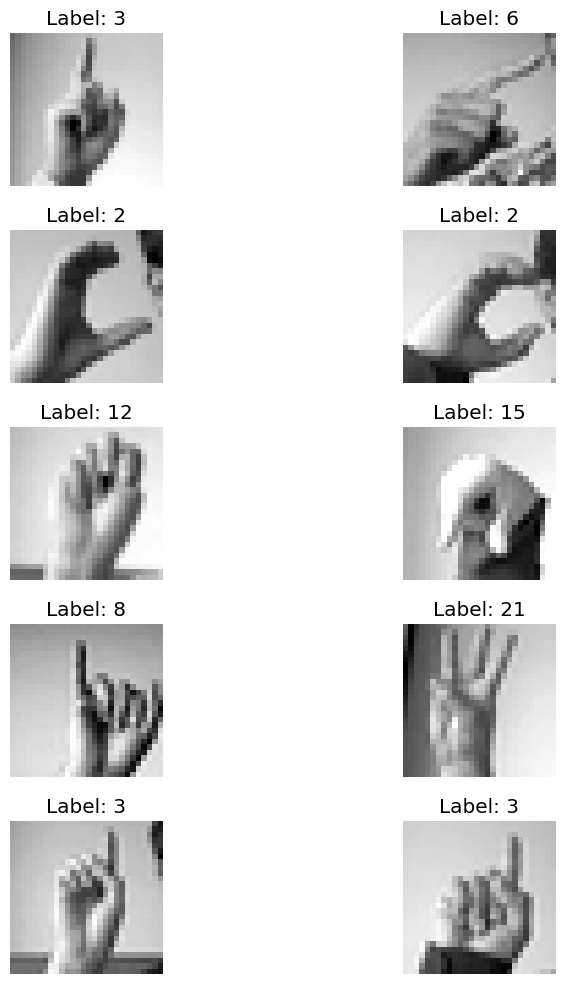

In [ ]:
#displaying first 10 images
# Extract pixel values and labels
pixel_columns = train.columns[1:]
pixel_values = train[pixel_columns].values
labels = train['label'].values

# Display images
fig, axes = plt.subplots(5, 2, figsize=(8, 10))
fig.tight_layout()


for i in range(10):
    row = i // 2
    col = i % 2
    pixel_array = pixel_values[i].reshape(28, 28)
    # Display image on the corresponding subplot
    axes[row, col].imshow(pixel_array, cmap='gray')
    axes[row, col].set_title('Label: ' + str(labels[i]))
    axes[row, col].axis('off')

# Show the plot
plt.show()

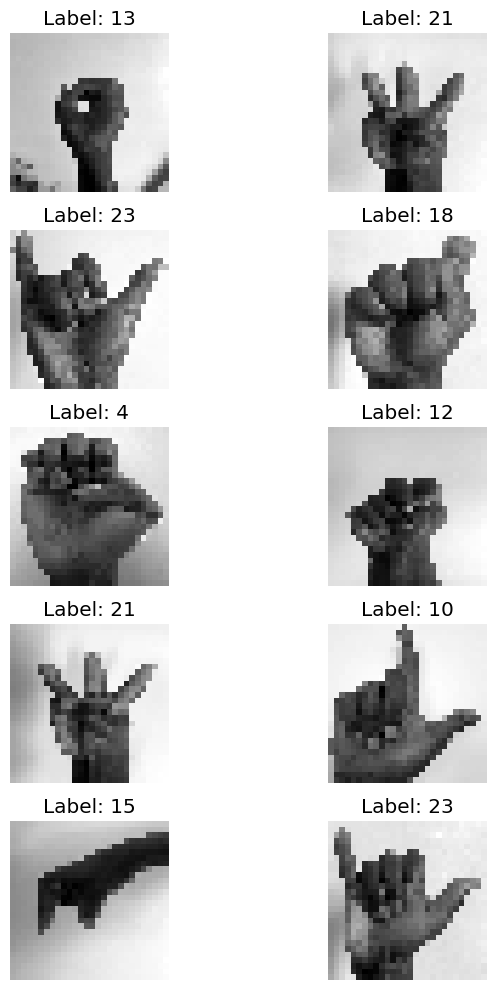

In [ ]:
# Displaying the last 10 images
pixel_columns = train.columns[1:]
pixel_values = train[pixel_columns].values
labels = train['label'].values

# Get the last 10 images
last_10_images = pixel_values[-10:]
last_10_labels = labels[-10:]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

# Display images
for i, ax in enumerate(axes.flat):
    pixel_array = last_10_images[i].reshape(28, 28)
    ax.imshow(pixel_array, cmap='gray')
    ax.set_title('Label: ' + str(last_10_labels[i]))
    ax.axis('off')

plt.tight_layout()
plt.show()

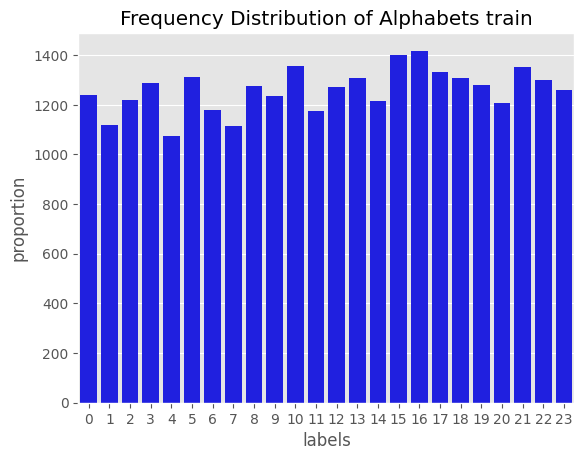

In [ ]:
# Distribution of the labels column train dataset
def check_distribution(data, col, name):
  sns.countplot(data=data, x=col, color="blue")
  plt.xlabel('labels')
  plt.ylabel('proportion')
  plt.title(f"Frequency Distribution of Alphabets {(name)}")
  plt.show();

check_distribution(train, 'label', "train")

*  In the analysis conducted, it was found that the label column exhibits a fairly distributed class distribution with no notable class imbalances. All classes display similar proportions, indicating a well-balanced dataset. This characteristic ensures that the model will have an equal opportunity to learn from and make accurate predictions across all classes.

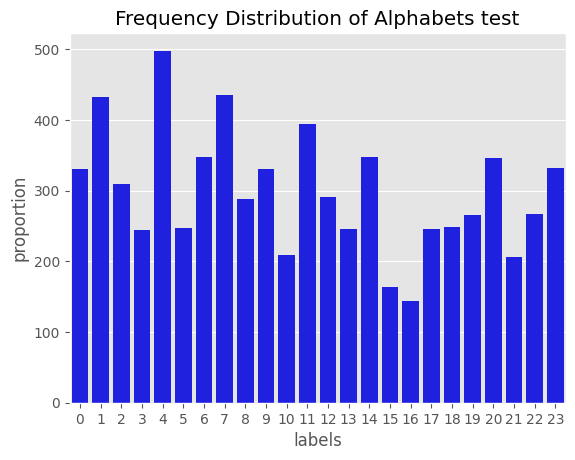

In [ ]:
# Distribution of the labels column test dataset
check_distribution(test, 'label', "test")

### **MODELLING**

In [ ]:
# Splitting the train and test datasets
train_X = train.iloc[:, 1:]
train_y = train.label

test_X = test.iloc[:, 1:]
test_y = test.label

In [ ]:
#onehot encoding the train and test labels
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
# Normalizing our train and test data
train_X /= 255
test_X /= 255

In [ ]:
train_X_reshaped = np.array(train_X).reshape(-1, 28, 28, 1)
test_X_reshaped = np.array(test_X).reshape(-1, 28, 28, 1)

In [ ]:
#Preprocessing the images
def preprocess_images(images):
    preprocessed_images = []
    for image in images:
        image = skimage.filters.gaussian(image, sigma=1)
        image = skimage.exposure.equalize_hist(image)
        # blurred = cv2.GaussianBlur(image, (3,3), 0)
        preprocessed_images.append(image)
    return np.array(preprocessed_images).reshape(-1, 28, 28, 1)


train_X_reshaped = preprocess_images(train_X_reshaped)
test_X_reshaped = preprocess_images(test_X_reshaped)

#### Baseline Model (Densely connected model)
The dense neural network architecture is chosen for its ability to capture complex patterns and relationships within the data.

In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# def create_model():
#     model = Sequential()
#     model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
#     model.add(layers.Dense(32, activation="relu"))
#     model.add(layers.Dense(24, activation='softmax'))
#     model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Create a KerasClassifier wrapper for scikit-learn compatibility
# model = KerasClassifier(build_fn=create_model)

In [ ]:
# # Define the hyperparameter grid
# from sklearn.model_selection import GridSearchCV, KFold

# param_grid = {
#     'epochs': [150, 200, 250],       # Specify different epoch values to evaluate
#     'batch_size': [100, 150, 200]    # Specify different batch size values to evaluate
# }

# # Perform grid search with cross-validation
# kfold = KFold(n_splits=3, shuffle=True)  # Adjust the number of splits as needed
# baseline_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, verbose=1,
#                              scoring="accuracy")
# baseline_grid_result = baseline_grid.fit(train_X, train_y)

# #Best Params
# print("Best Parameters:")
# print(baseline_grid_result.best_params_)
# print()
# print(baseline_grid_result.best_score_)

* Did a GridSearch to get the optimal values of epochs and batchsize which were epochs=150 and batch_size=100

In [ ]:
# two layers baseline model
baseline_model = Sequential()
baseline_model.add(layers.Dense(64, activation="relu", input_shape=(784,)))
baseline_model.add(layers.Dense(32, activation="relu"))
baseline_model.add(layers.Dense(24, activation="softmax"))

#compiling our model
baseline_model.compile(loss="categorical_crossentropy",
                       optimizer="sgd",
                       metrics=["acc"])

#fitting the model
baseline_history = baseline_model.fit(train_X, train_y,
                                      epochs=150, batch_size=100,
                                      validation_split=0.25)

Epoch 1/150
227/227 [==============================] - 2s 6ms/step - loss: 3.1377 - acc: 0.0848 - val_loss: 3.1297 - val_acc: 0.0799
Epoch 2/150
227/227 [==============================] - 1s 4ms/step - loss: 3.0465 - acc: 0.1245 - val_loss: 3.0747 - val_acc: 0.0998
Epoch 3/150
227/227 [==============================] - 1s 5ms/step - loss: 2.9033 - acc: 0.1535 - val_loss: 3.0021 - val_acc: 0.1336
Epoch 4/150
227/227 [==============================] - 1s 4ms/step - loss: 2.6861 - acc: 0.2206 - val_loss: 2.9871 - val_acc: 0.1724
Epoch 5/150
227/227 [==============================] - 1s 4ms/step - loss: 2.4325 - acc: 0.2953 - val_loss: 2.9738 - val_acc: 0.2342
Epoch 6/150
227/227 [==============================] - 1s 4ms/step - loss: 2.2037 - acc: 0.3569 - val_loss: 3.0233 - val_acc: 0.2355
Epoch 7/150
227/227 [==============================] - 1s 4ms/step - loss: 2.0216 - acc: 0.3949 - val_loss: 3.0664 - val_acc: 0.2850
Epoch 8/150
227/227 [==============================] - 1s 4ms/step - 

In [ ]:
baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 24)                792       
                                                                 
Total params: 53,112
Trainable params: 53,112
Non-trainable params: 0
_________________________________________________________________


The  model is a sequential model, which means the layers are stacked on top of each other sequentially. It has three dense layers.

The first dense layer has 64 neurons. This layer has 50,240 parameters, which means it has 50,240 trainable weights and biases.

The second dense layer has 32 neurons and  has 2,080 parameters.

The third dense layer has 24 neurons and has 792 parameters.

Overall, the model has a total of 53,112 parameters, and all of them are trainable, meaning they will be updated during the training process to optimize the model's performance.

In [ ]:
print("Baseline model test data accuracy: ")
baseline_model.evaluate(test_X, test_y)

Baseline model test data accuracy: 
225/225 [==============================] - 1s 2ms/step - loss: 1.4783 - acc: 0.6994


[1.4783029556274414, 0.699386477470398]

The baseline model achieved a test data accuracy of 69.94%. It was trained and evaluated on a dataset consisting of 225 samples. The model's loss, a measure of how well it predicts the correct output, was 1.4783. These results suggest that the baseline model performs reasonably well, although there is room for improvement in terms of accuracy.

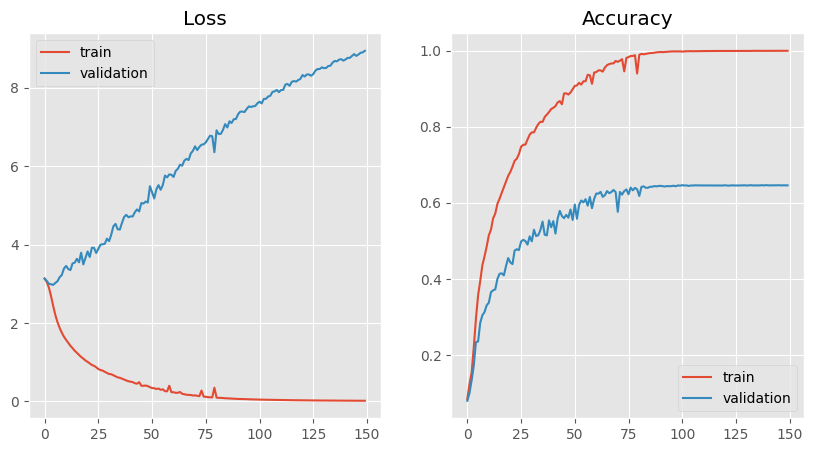

In [ ]:
#Plotting the loss and accuracy of the test and validation datasets
def plot_loss_and_accuracy(results, final=False):

    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_accuracy = results.history['acc']
    val_accuracy = results.history['val_acc']

    # Setting up plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    # Plotting accuracy info
    ax2.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax2, label=val_label)
    ax2.legend()

#baseline model loss and accuracy
plot_loss_and_accuracy(baseline_history)

*  From the above graphs we see that the model is overfitting and not generalizing well on the test data, resulting in a modest accuracy score of 70%. This indicates a need for further improvements or adjustments to the model to enhance its performance.

#### CNN Models

The CNN model is particularly tailored for tasks involving image recognition because it utilizes convolutional layers to effectively learn spatial features and enhance the model's capability to identify patterns within images.

In [ ]:
#Reshaping the train and test dataset
train_X_reshaped = np.array(train_X).reshape(-1, 28, 28, 1)
test_X_reshaped = np.array(test_X).reshape(-1, 28, 28, 1)

In [ ]:
# Fitting a CNN model
cnn_model1 = Sequential()
cnn_model1.add(layers.Conv2D(64, (3,3), activation="tanh", input_shape=(28,28,1)))
cnn_model1.add(layers.MaxPool2D((2,2)))
cnn_model1.add(layers.Conv2D(32, (3,3), activation="tanh"))
cnn_model1.add(layers.MaxPooling2D((2,2)))
cnn_model1.add(layers.Flatten())
cnn_model1.add(layers.Dense(64, activation="tanh"))
cnn_model1.add(layers.Dense(24, activation="softmax"))

#Compiling the model
cnn_model1.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["acc"])

#Fitting the model
cnn_model1_results = cnn_model1.fit(train_X_reshaped, train_y,
                                  epochs=10, batch_size=100,
                                  validation_split=0.25)


Epoch 1/10
227/227 [==============================] - 25s 101ms/step - loss: 1.4554 - acc: 0.6183 - val_loss: 1.9619 - val_acc: 0.6092
Epoch 2/10
227/227 [==============================] - 23s 100ms/step - loss: 0.2647 - acc: 0.9615 - val_loss: 1.8845 - val_acc: 0.6714
Epoch 3/10
227/227 [==============================] - 23s 99ms/step - loss: 0.0799 - acc: 0.9970 - val_loss: 1.9461 - val_acc: 0.6743
Epoch 4/10
227/227 [==============================] - 22s 99ms/step - loss: 0.0331 - acc: 1.0000 - val_loss: 2.0034 - val_acc: 0.6736
Epoch 5/10
227/227 [==============================] - 22s 98ms/step - loss: 0.0179 - acc: 1.0000 - val_loss: 2.0503 - val_acc: 0.6769
Epoch 6/10
227/227 [==============================] - 22s 97ms/step - loss: 0.0112 - acc: 1.0000 - val_loss: 2.0816 - val_acc: 0.6776
Epoch 7/10
227/227 [==============================] - 22s 98ms/step - loss: 0.0077 - acc: 1.0000 - val_loss: 2.1332 - val_acc: 0.6788
Epoch 8/10
227/227 [==============================] - 22s 98

In [ ]:
# Evaluating the train and test datasets
def evaluation_train(model, X, y, name):
    print(f"{name} train data accuracy: ")
    print(model.evaluate(X, y))
    print()

def evaluation_test(model, X, y, name):
    print(f"{name} test data accuracy: ")
    print(model.evaluate(X, y))
    print()

evaluation_train(cnn_model1, train_X_reshaped, train_y, "cnn_model1")
evaluation_test(cnn_model1, test_X_reshaped, test_y, "cnn_model1")

cnn_model1 train data accuracy: 
946/946 [==============================] - 8s 8ms/step - loss: 0.5587 - acc: 0.9194
[0.5587444305419922, 0.9193612337112427]

cnn_model1 test data accuracy: 
225/225 [==============================] - 2s 8ms/step - loss: 0.2482 - acc: 0.9310
[0.24820229411125183, 0.9309815764427185]



The first CNN model demonstrated strong performance in both the training and test phases. It achieved high accuracy on both sets, indicating its ability to effectively recognize and classify images. The relatively low loss values further validate the model's capability to make accurate predictions.

In [ ]:
# Fitting a CNN model
cnn_model2 = Sequential()
cnn_model2.add(layers.Conv2D(64, (3,3), activation="tanh", input_shape=(28,28,1)))
cnn_model2.add(layers.MaxPool2D((2,2)))
cnn_model2.add(layers.Conv2D(32, (3,3), activation="tanh"))
cnn_model2.add(layers.MaxPooling2D((2,2)))
cnn_model2.add(layers.Flatten())
cnn_model2.add(layers.Dense(64, activation="tanh"))
cnn_model2.add(layers.Dense(24, activation="softmax"))

#Compiling the model
cnn_model2.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop",
                  metrics=["acc"])

#Fitting the model
cnn_model2_results = cnn_model2.fit(train_X_reshaped, train_y,
                                  epochs=10, batch_size=100,
                                  validation_split=0.25)


Epoch 1/10
227/227 [==============================] - 24s 102ms/step - loss: 1.3722 - acc: 0.6441 - val_loss: 2.0165 - val_acc: 0.5996
Epoch 2/10
227/227 [==============================] - 22s 97ms/step - loss: 0.2843 - acc: 0.9499 - val_loss: 1.9941 - val_acc: 0.6718
Epoch 3/10
227/227 [==============================] - 22s 98ms/step - loss: 0.0616 - acc: 0.9969 - val_loss: 2.1919 - val_acc: 0.6764
Epoch 4/10
227/227 [==============================] - 22s 97ms/step - loss: 0.0119 - acc: 0.9998 - val_loss: 2.3758 - val_acc: 0.6784
Epoch 5/10
227/227 [==============================] - 22s 98ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.4935 - val_acc: 0.6787
Epoch 6/10
227/227 [==============================] - 22s 97ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.5750 - val_acc: 0.6806
Epoch 7/10
227/227 [==============================] - 23s 102ms/step - loss: 9.4027e-04 - acc: 1.0000 - val_loss: 2.6281 - val_acc: 0.6780
Epoch 8/10
227/227 [==============================] - 22

In [ ]:
#Evaluating train and test datasets
evaluation_train(cnn_model2, train_X_reshaped, train_y, "cnn_model2")
evaluation_test(cnn_model2, test_X_reshaped, test_y, "cnn_model2")

cnn_model2 train data accuracy: 
946/946 [==============================] - 9s 9ms/step - loss: 0.6817 - acc: 0.9203
[0.6816754937171936, 0.9203200340270996]

cnn_model2 test data accuracy: 
225/225 [==============================] - 2s 8ms/step - loss: 0.2486 - acc: 0.9437
[0.24861842393875122, 0.943669855594635]



The second CNN model (cnn_model2) shows an improvement in performance compared to the first CNN model. It achieved slightly higher accuracy scores on both the training and test data, indicating improved generalization capabilities and better pattern recognition. The reduced loss values in both training and test data also suggest enhanced predictive ability in the second model.

In [ ]:
#fitting the third CNN model
cnn_model3 = Sequential()
cnn_model3.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn_model3.add(layers.MaxPooling2D((2, 2)))
cnn_model3.add(layers.Conv2D(32, (3,3), activation="relu"))
cnn_model3.add(layers.MaxPooling2D((2,2)))
cnn_model3.add(layers.Flatten())
cnn_model3.add(layers.Dense(64, activation="relu"))
cnn_model3.add(layers.Dense(24, activation="softmax"))

# Compiling the CNN model
cnn_model3.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["acc"])

# Fitting the CNN model
cnn_model3_results = cnn_model3.fit(train_X_reshaped, train_y,
                            epochs=10, batch_size=100,
                            validation_split=0.25)

Epoch 1/10
227/227 [==============================] - 23s 96ms/step - loss: 1.8634 - acc: 0.4613 - val_loss: 3.3344 - val_acc: 0.5161
Epoch 2/10
227/227 [==============================] - 21s 94ms/step - loss: 0.4799 - acc: 0.8551 - val_loss: 4.0657 - val_acc: 0.6164
Epoch 3/10
227/227 [==============================] - 22s 95ms/step - loss: 0.1792 - acc: 0.9560 - val_loss: 5.1306 - val_acc: 0.6551
Epoch 4/10
227/227 [==============================] - 22s 95ms/step - loss: 0.0752 - acc: 0.9877 - val_loss: 6.1178 - val_acc: 0.6595
Epoch 5/10
227/227 [==============================] - 21s 94ms/step - loss: 0.0344 - acc: 0.9970 - val_loss: 7.1142 - val_acc: 0.6644
Epoch 6/10
227/227 [==============================] - 21s 94ms/step - loss: 0.0196 - acc: 0.9989 - val_loss: 7.6514 - val_acc: 0.6693
Epoch 7/10
227/227 [==============================] - 21s 94ms/step - loss: 0.0113 - acc: 0.9996 - val_loss: 8.2160 - val_acc: 0.6646
Epoch 8/10
227/227 [==============================] - 21s 94ms

In [ ]:
#Evaluating train and test datasets
evaluation_train(cnn_model3, train_X_reshaped, train_y, "cnn_model3")
evaluation_test(cnn_model3, test_X_reshaped, test_y, "cnn_model3")

cnn_model3 train data accuracy: 
946/946 [==============================] - 9s 9ms/step - loss: 2.3424 - acc: 0.9161
[2.3423538208007812, 0.9160881042480469]

cnn_model3 test data accuracy: 
225/225 [==============================] - 2s 9ms/step - loss: 0.4291 - acc: 0.8995
[0.4290989339351654, 0.8994701504707336]



The second CNN model (cnn_model2) performs the best among the three models. It achieved the highest accuracy on both the training and test data, indicating better generalization and pattern recognition abilities.

The first CNN model (cnn_model1) also performed well, but the third CNN model (cnn_model3) had lower accuracies on both training and test data, suggesting it might not be as effective as the other two models.

From the analysis, the best and final model is the second cnn model.Let's visualize the loss and accuracy of our final model.

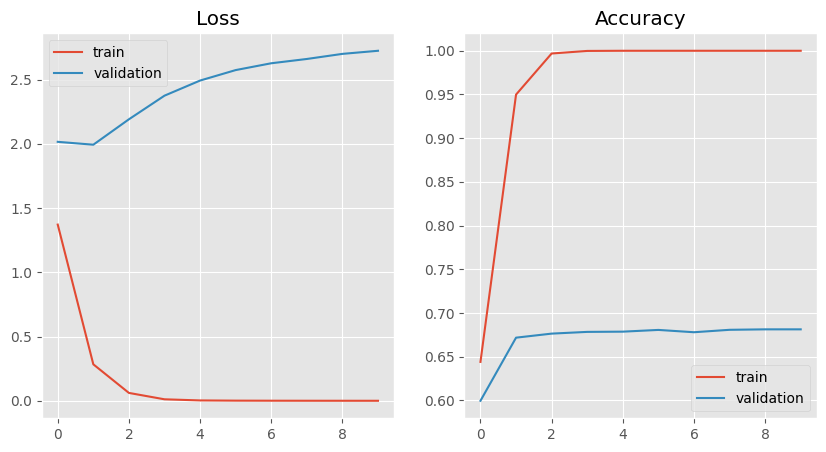

In [ ]:
#plotting loss and accuracy of the best model from the three models
plot_loss_and_accuracy(cnn_model2_results)

The observed low validation accuracy is a result of mixing the data with our raw data, indicating that the model struggles to generalize effectively. Among the three fitted models, the second model achieved the highest accuracy score of 94% in the test set. However, it is apparent that this model is overfitting the training data, prompting the exploration of regularization techniques to mitigate this issue.

#### Tuning CNN Model

In [ ]:
#Adding Dropout and l2 and l1 regularization
tuned_model = Sequential()
tuned_model.add(layers.Conv2D(64, (3,3), activation="tanh",
                              kernel_regularizer = regularizers.l2(0.005),
                              input_shape=(28,28,1)))
tuned_model.add(layers.MaxPool2D((2,2)))
tuned_model.add(layers.Dropout(0.3))
tuned_model.add(layers.Conv2D(32, (3,3), activation="tanh"))
tuned_model.add(layers.MaxPooling2D((2,2)))
tuned_model.add(layers.Dropout(0.3))
tuned_model.add(layers.Flatten())
tuned_model.add(layers.Dense(64, activation="tanh"))
tuned_model.add(layers.Dropout(0.25))
tuned_model.add(layers.Dense(24, activation="softmax"))

#Compiling the model
tuned_model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop",
                  metrics=["acc"])

#Fitting the model
tuned_model_results = tuned_model.fit(train_X_reshaped, train_y,
                                  epochs=10, batch_size=100,
                                  validation_split=0.25)

Epoch 1/10
227/227 [==============================] - 35s 132ms/step - loss: 1.8501 - acc: 0.4735 - val_loss: 2.0992 - val_acc: 0.5448
Epoch 2/10
227/227 [==============================] - 28s 124ms/step - loss: 0.6881 - acc: 0.8129 - val_loss: 1.9549 - val_acc: 0.6414
Epoch 3/10
227/227 [==============================] - 28s 123ms/step - loss: 0.3768 - acc: 0.9062 - val_loss: 2.0555 - val_acc: 0.6664
Epoch 4/10
227/227 [==============================] - 28s 123ms/step - loss: 0.2358 - acc: 0.9469 - val_loss: 2.0809 - val_acc: 0.6755
Epoch 5/10
227/227 [==============================] - 28s 124ms/step - loss: 0.1632 - acc: 0.9661 - val_loss: 2.1940 - val_acc: 0.6763
Epoch 6/10
227/227 [==============================] - 29s 128ms/step - loss: 0.1216 - acc: 0.9770 - val_loss: 2.3037 - val_acc: 0.6797
Epoch 7/10
227/227 [==============================] - 32s 142ms/step - loss: 0.0990 - acc: 0.9830 - val_loss: 2.4167 - val_acc: 0.6761
Epoch 8/10
227/227 [==============================] - 3

In [ ]:
#Evaluating train and test datasets
evaluation_train(tuned_model, train_X_reshaped, train_y, "tuned_model")
evaluation_test(tuned_model, test_X_reshaped, test_y, "tuned_model")

tuned_model train data accuracy: 
946/946 [==============================] - 9s 10ms/step - loss: 0.6608 - acc: 0.9189
[0.6607636213302612, 0.9189314246177673]

tuned_model test data accuracy: 
225/225 [==============================] - 2s 9ms/step - loss: 0.2891 - acc: 0.9105
[0.2890761196613312, 0.9104852080345154]



Despite the regularization attempts, the model did not improve significantly, as the accuracy decreased to 91% on the test data. This suggests that the regularization techniques used might not have been effective in mitigating overfitting or improving the model's generalization capabilities.

In the subsequent cells, there are visualizations of predictions made by the second model (cnn_model2), which achieved the highest accuracy of 94% on the test data.

In [ ]:
#Making Predictions
predictions = cnn_model2.predict(test_X_reshaped)
pred_labels = pd.Series([np.argmax(x) for x in predictions])

225/225 [==============================] - 2s 10ms/step


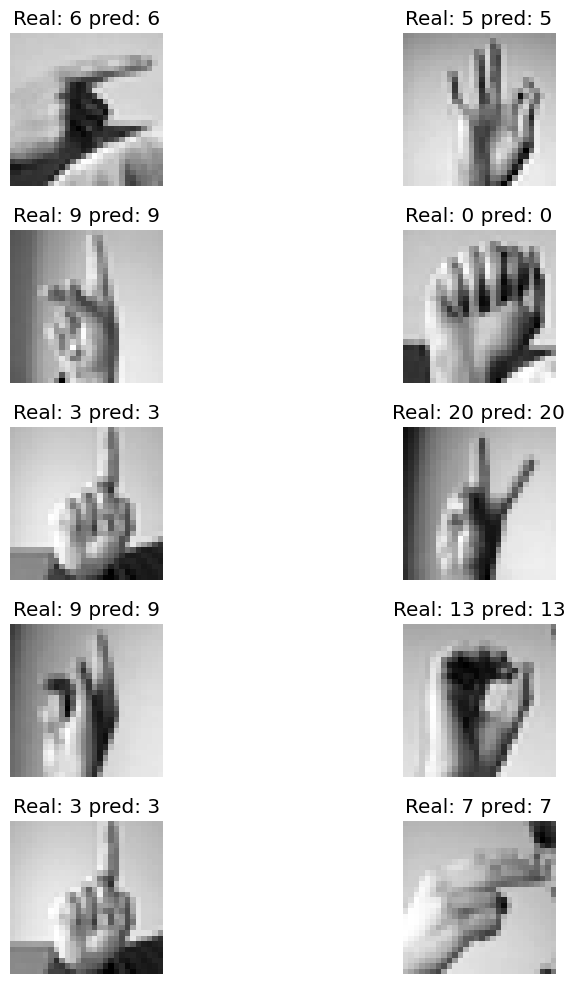

In [ ]:
#displaying images
# Extract pixel values and labels
pixel_columns = test.columns[1:]
pixel_values = test[pixel_columns].values
labels = test['label'].values
pred_labels = pred_labels.values

# Display images
fig, axes = plt.subplots(5, 2, figsize=(8, 10))
fig.tight_layout()

# Display images
for i in range(10):
    row = i // 2
    col = i % 2
    pixel_array = pixel_values[i].reshape(28, 28)
    # Display image on the corresponding subplot
    axes[row, col].imshow(pixel_array, cmap='gray')
    axes[row, col].set_title(f"Real: {labels[i]} pred: {pred_labels[i]}")
    axes[row, col].axis('off')

# Show the plot
plt.show()

Based on the provided visualizations, it is evident that the second model (cnn_model2) performs well in predicting the images. The model demonstrates a strong ability to accurately classify the images based on the visual representations. The predictions align closely with the actual labels of the images, indicating that the model has learned to recognize and differentiate various patterns and features within the images effectively. Overall, the visualizations affirm the model's proficiency in image prediction tasks.

#### Further Tuning

In order to enhance the model's performance, we conducted further tuning by modifying the architecture and incorporating additional techniques. The following adjustments were made:

* **Batch Normalization**: Batch normalization was introduced after the first and fourth layers. This technique aids in stabilizing and accelerating the training process, ultimately improving the model's overall performance.

* **RMSprop with Learning Rate**: We utilized the RMSprop optimizer with a learning rate of 0.001. This choice of optimizer helps optimize the model's weights and biases, leading to more efficient training.

* **Dropout Regularization**: Dropout regularization was implemented in the first and second dropout layers with a dropout rate of 0.25. This technique randomly drops out a proportion of neurons during training, helping to prevent overfitting and enhance generalization. Additionally, an l2 regularization parameter of 0.005 was employed to further combat overfitting.

By incorporating these modifications, we aim to observe any potential improvements in the model's performance. The tuned model will also be evaluated using our collected raw data to assess its effectiveness in real-world scenarios.

In [ ]:
#modelling our combined data
combined_model = Sequential()
combined_model.add(layers.Conv2D(32, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.005),
                            input_shape=(28,28,1), padding="same"))
combined_model.add(layers.BatchNormalization())
combined_model.add(layers.Conv2D(64, (3,3), activation="relu"))
combined_model.add(layers.MaxPooling2D((2,2)))
combined_model.add(layers.Conv2D(128, (3,3), activation="relu"))
combined_model.add(layers.MaxPooling2D((2,2)))
combined_model.add(layers.Flatten())
combined_model.add(layers.Dense(512, activation="relu"))
combined_model.add(layers.BatchNormalization())
combined_model.add(layers.Dropout(0.25))
combined_model.add(layers.Dense(128, activation="relu"))
combined_model.add(layers.Dropout(0.25))
combined_model.add(layers.Dense(24, activation="softmax"))

#Compiling the model
optimizer = optimizers.RMSprop(learning_rate=0.001)
combined_model.compile(loss="categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["acc"])

#Fitting the model
raw_model_results = combined_model.fit(train_X_reshaped, train_y,
                                  epochs=10, batch_size=100, validation_split=0.25)

Epoch 1/10
227/227 [==============================] - 92s 392ms/step - loss: 0.2746 - acc: 0.9308 - val_loss: 4.7599 - val_acc: 0.1267
Epoch 2/10
227/227 [==============================] - 94s 414ms/step - loss: 0.0228 - acc: 0.9954 - val_loss: 2.8853 - val_acc: 0.4852
Epoch 3/10
227/227 [==============================] - 86s 377ms/step - loss: 0.0131 - acc: 0.9974 - val_loss: 3.0133 - val_acc: 0.6361
Epoch 4/10
227/227 [==============================] - 84s 368ms/step - loss: 0.0101 - acc: 0.9983 - val_loss: 4.1450 - val_acc: 0.6829
Epoch 5/10
227/227 [==============================] - 83s 367ms/step - loss: 0.0084 - acc: 0.9988 - val_loss: 3.8663 - val_acc: 0.6709
Epoch 6/10
227/227 [==============================] - 84s 370ms/step - loss: 0.0071 - acc: 0.9988 - val_loss: 4.6184 - val_acc: 0.6476
Epoch 7/10
227/227 [==============================] - 93s 408ms/step - loss: 0.0051 - acc: 0.9993 - val_loss: 4.2031 - val_acc: 0.6709
Epoch 8/10
227/227 [==============================] - 8

In [ ]:
#Evaluating train and test datasets
evaluation_train(combined_model, train_X_reshaped, train_y, "combined_model")
evaluation_test(combined_model, test_X_reshaped, test_y, "combined_model")

combined_model train data accuracy: 
946/946 [==============================] - 28s 30ms/step - loss: 1.2923 - acc: 0.9241
[1.292325496673584, 0.9240560531616211]

combined_model test data accuracy: 
225/225 [==============================] - 7s 30ms/step - loss: 0.3942 - acc: 0.9229
[0.3941572904586792, 0.9228945970535278]



The model is currently being trained for 10 epochs and is achieving an accuracy of 92.40% on the training set and 92.28% on the validation set.

The training process starts with a learning rate of 0.001, and the model is optimized using the rmsprop optimizer. As each epoch progresses, the model's loss decreases, indicating that it is learning to recognize patterns more effectively.

After each epoch, the model's performance is evaluated on the validation set, calculating the accuracy. The accuracy on the validation set steadily increases as the model is trained. However, it is observed that the model is still overfitting, indicating that it does not generalize well on the raw test data.

To assess how well the model generalizes to real-world data, it is being tested exclusively on the collected raw dataset. This evaluation aims to determine the model's performance on previously unseen data and provides insights into its ability to generalize to new examples.

In [ ]:
# subsetting and preprocessing the collected raw images
raw_test_X = test_df.iloc[:, 1:]
raw_test_y = to_categorical(test_df.label)

#scaling
raw_test_X /= 255
raw_test_X_reshaped = np.array(raw_test_X).reshape(-1, 28, 28, 1)

raw_test_X_reshaped = preprocess_images(raw_test_X_reshaped)

In [ ]:
# Evaluating the combined model on our collected data (the raw images)
combined_model.evaluate(raw_test_X_reshaped, raw_test_y)

1/1 [==============================] - 0s 82ms/step - loss: 10.5009 - acc: 0.2069


[10.500885963439941, 0.2068965584039688]

The model's performance on the given data is poor, as it achieves an accuracy of 20.69%. This low accuracy indicates that the model faces challenges in accurately predicting outcomes on unseen data.

To further assess the model's generalization capabilities, we will exclusively train the final tuned model using our own dataset.

This focused training aims to evaluate whether the model can effectively generalize and perform well on this specific dataset.

### **Raw Collected Data**

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             zoom_range=0.1,
                             horizontal_flip=False)
train_raw_generator = datagen.flow_from_directory("data/train", target_size=(64,64), batch_size=3000,
                                                  class_mode="categorical")
validation_raw_generator = ImageDataGenerator(rescale=1./255).\
    flow_from_directory("data/test", target_size=(64,64), batch_size=3000, class_mode="categorical")


Found 2820 images belonging to 24 classes.
Found 303 images belonging to 24 classes.


In [ ]:
train_raw_X, train_raw_y = next(train_raw_generator)
test_raw_X, test_raw_y = next(validation_raw_generator)

In [ ]:
#Preprocessing images
def preprocess_images(images):
    preprocessed_images = []
    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = np.expand_dims(gray, 2)
        image = skimage.filters.gaussian(gray, sigma=1)
        image = skimage.exposure.equalize_hist(image)
        # blurred = cv2.GaussianBlur(image, (3,3), 0)
        preprocessed_images.append(image)
    return np.array(preprocessed_images).reshape(-1, 64, 64, 1)


raw_train_X = preprocess_images(train_raw_X)
raw_test_X = preprocess_images(test_raw_X)

In [ ]:
#Fitting a CNN model on the raw dataset only
raw_model = Sequential()
raw_model.add(layers.Conv2D(32, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.005),
                            input_shape=(64,64,1), padding="same"))
raw_model.add(layers.BatchNormalization())
raw_model.add(layers.Conv2D(64, (3,3), activation="relu"))
raw_model.add(layers.MaxPooling2D((2,2)))
raw_model.add(layers.Dropout(0.25))
raw_model.add(layers.Conv2D(128, (3,3), activation="relu"))
raw_model.add(layers.MaxPooling2D((2,2)))
raw_model.add(layers.Dropout(0.25))
raw_model.add(layers.Flatten())
raw_model.add(layers.Dense(128, activation="relu"))
raw_model.add(layers.BatchNormalization())
raw_model.add(layers.Dropout(0.25))
raw_model.add(layers.Dense(64, activation="relu"))
raw_model.add(layers.Dropout(0.25))
raw_model.add(layers.Dense(24, activation="softmax"))

#Compiling the model
raw_model.compile(loss="categorical_crossentropy",
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=["acc"])

#Fitting the model
raw_model_results = raw_model.fit(raw_train_X, train_raw_y,
                                  epochs=15, batch_size=10)

Epoch 1/15
282/282 [==============================] - 80s 276ms/step - loss: 2.1687 - acc: 0.3791
Epoch 2/15
282/282 [==============================] - 82s 290ms/step - loss: 1.1293 - acc: 0.6716
Epoch 3/15
282/282 [==============================] - 75s 266ms/step - loss: 0.6962 - acc: 0.7894
Epoch 4/15
282/282 [==============================] - 76s 270ms/step - loss: 0.5178 - acc: 0.8418
Epoch 5/15
282/282 [==============================] - 73s 259ms/step - loss: 0.3938 - acc: 0.8759
Epoch 6/15
282/282 [==============================] - 75s 265ms/step - loss: 0.3101 - acc: 0.8986
Epoch 7/15
282/282 [==============================] - 71s 250ms/step - loss: 0.2761 - acc: 0.9149
Epoch 8/15
282/282 [==============================] - 73s 259ms/step - loss: 0.2547 - acc: 0.9252
Epoch 9/15
282/282 [==============================] - 70s 250ms/step - loss: 0.2167 - acc: 0.9348
Epoch 10/15
282/282 [==============================] - 70s 247ms/step - loss: 0.1752 - acc: 0.9475
Epoch 11/15
282/282

In [ ]:
# Evaluating train and test datasets
evaluation_train(raw_model, raw_train_X, train_raw_y, "raw_model")
evaluation_test(raw_model, raw_test_X, test_raw_y, "raw_model")

raw_model train data accuracy: 
89/89 [==============================] - 12s 140ms/step - loss: 0.0121 - acc: 0.9986
[0.012146195396780968, 0.99858158826828]

raw_model test data accuracy: 
10/10 [==============================] - 2s 141ms/step - loss: 0.1531 - acc: 0.9604
[0.1531226634979248, 0.9603960514068604]





The model's performance suggests that it did not suffer from significant overfitting. The comparable accuracies between the training and test data demonstrats that the model's performance on unseen data is similar to its performance on the training data.


Given the raw_model's remarkable performance with high accuracy on both the training and test data, it demonstrates its capability to generalize effectively and make accurate predictions on unseen or raw data. Therefore, we'll save this model and utilize it for future predictions and applications.



In [ ]:
#Saving the model
#raw_model.save("best_model.h5")

To provide a preview of the model's performance on the test data, we will visualize a selection of images along with their corresponding predicted labels and real labels.

This will offer a glimpse into how well the model performed in accurately classifying the images and provide insights into its overall effectiveness on the test data.

In [ ]:
# Making predictions with the raw_model
predictions = raw_model.predict(raw_test_X)
pred_labels = [np.argmax(x) for x in predictions]
y_labels = [np.argmax(x) for x in test_raw_y]

10/10 [==============================] - 1s 123ms/step


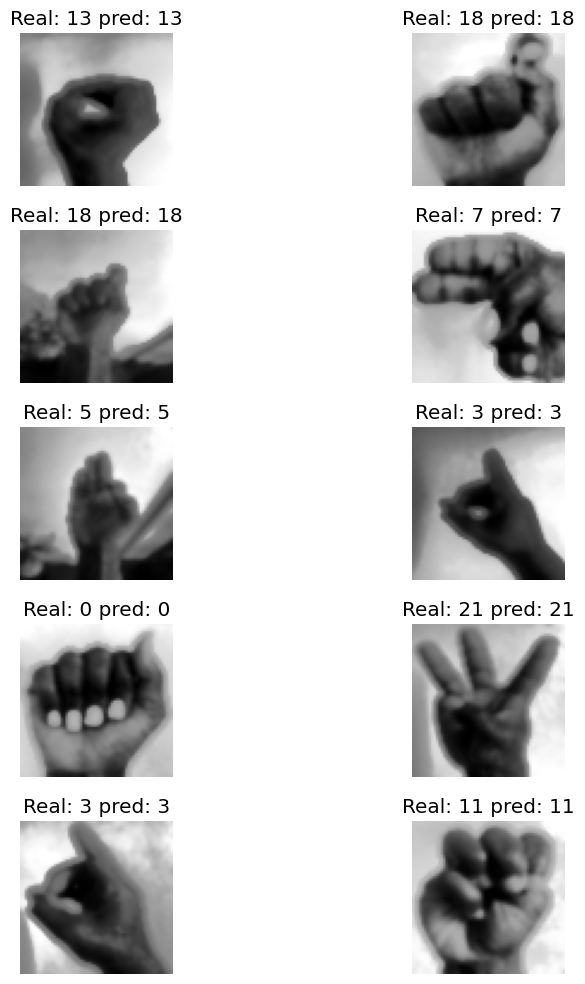

In [ ]:
# Display images predicted from the raw_model
fig, axes = plt.subplots(5, 2, figsize=(8, 10))
fig.tight_layout()

# Display images
for i in range(10):
    row = i // 2
    col = i % 2
    pixel_array = raw_test_X[i]
    # Display image on the corresponding subplot
    axes[row, col].imshow(pixel_array, cmap='gray')
    axes[row, col].set_title(f"Real: {y_labels[i]} pred: {pred_labels[i]}")
    axes[row, col].axis('off')

# Show the plot
plt.show()

After visualizing a selection of images from the test data alongside their predicted labels and real labels, it is evident that the model performed exceptionally well in its predictions.

The predicted labels closely aligns with the real labels, indicating the model's accurate classification abilities. This further validates the efficacy of the model and shows its proficiency in recognizing and accurately labeling images from the test dataset.

The visualized images provide strong evidence of the model's impressive performance and its ability to make precise predictions on the test data.

# **Deployment**

#### Google Teachable Machine

##### Code to Take Pictures for Training GTM

In [ ]:
#Index of the webcam
cap = cv.VideoCapture(0)

#getting the detector
detector = hd(maxHands=1)

#helps to ensure there's enough space for the gestures
offset = 40
imgSize = 800

folder = 'Data/A'
counter = 0

while True:
    success, img = cap.read()
    hands, img = detector.findHands(img)

    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h/w

        if aspectRatio > 1:
            k = imgSize/h
            wCal = math.ceil(k*w)
            imgResize = cv.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize-wCal)/2)
            imgWhite[0:, wGap:wCal + wGap] = imgResize
        else:
            k = imgSize/w
            hCal = math.ceil(k*h)
            imgResize = cv.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize-hCal)/2)
            imgWhite[hGap:hCal + hGap, :] = imgResize

        cv.imshow("ImageCrop", imgCrop)
        cv.imshow("ImageWhite", imgWhite)


    cv.imshow("Image", img)

    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('s'):
        counter += 1
        cv.imwrite(f'{folder}/Image_{time.time()}.jpg', imgWhite)
        print(counter)

cap.release()
cv.destroyAllWindows()

The Google Teachable Machine (GTM) is a web-based tool that helps to create machine learning models fast, easy, and accessible to everyone. With this tool, one can train a model with poses, images, and sounds and then use the model to make predictions based on new data.

While trying to scale our project further, we made use of GTM to train a model that could identify fingerspelling symbols in real time. To collec the data needed for this model, we took pictures of the symbols and made use of 600 images per letter and uploaded them to the model for training. We adjusted the epochs abd batch_sizes as we sought to find the best hyperparameters that will grant us the highest accuracy. Eventually, we settled for 200 epochs, 16 as the batch_size, and 0.001 as our learning rate.

>Challenges:

* The dataset was relatively small, which could have limited the accuracy of the model. For higher accuracy, the model needs to be fed with thousands of images of the letters.
* The images in the dataset were not of uniform quality, which could have also affected the accuracy of the model.
* The hand gestures in the dataset were limited to the 24 letters of the Kenyan Sign Language, which means that the model would not be able to recognize fingerspelling for other letters or words.

-----

>Conclusions:

* Despite the challenges, the model was able to achieve a relatively high accuracy of above 75% on the test dataset.
* The model could be used to improve communication for deaf and hard of hearing individuals, as it would allow them to communicate more easily with people who do not know sign language.

-----

> Recommendations:

* The dataset could be expanded to include more images of fingerspelling gestures, which would improve the accuracy of the model.
* The images in the dataset could be improved in terms of quality, which would also improve the accuracy of the model.
* The model could be extended to recognize fingerspelling for other letters and words, which would make it more versatile.
* The model could be integrated with other technologies, such as NLP and speech recognition, to provide a more comprehensive communication solution for deaf and hard of hearing individuals.